In [17]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Water consumption

In [18]:
# Dependencies and Setup
# Water consumption
import pandas as pd
from pathlib import Path

# Load the Austin water data
path = Path("Resources/austin_water.csv")
# Read the data
customer_data_df = pd.read_csv(path)
customer_data_df

,Year Month,Postal Code,Customer Class,Total Gallons
0,201201,78613,Irrigation - Multi-Family,11000
1,201201,78613,Multi-Family,23000
2,201201,78617,Residential,19840800
3,201201,78617,Multi-Family,2477000
4,201201,78652,Irrigation - Residential,38500
...,...,...,...,...
16815,202009,78758,Multi-Family,57603300
16816,202009,78759,Irrigation - Residential,114500
16817,202009,78759,Multi-Family,45024600
16818,202009,78759,Irrigation - Multi-Family,3684700


#### Clean Data

In [19]:
customer_data_df['Year Month'] = pd.to_datetime(customer_data_df['Year Month'], format='%Y%m')
customer_data_df = customer_data_df[(customer_data_df['Year Month'].dt.year >= 2013) & (customer_data_df['Year Month'].dt.year <= 2017)]
customer_data_df

,Year Month,Postal Code,Customer Class,Total Gallons
1850,2013-01-01,78613,Irrigation - Multi-Family,15000
1851,2013-01-01,78613,Multi-Family,20000
1852,2013-01-01,78617,Irrigation - Residential,200
1853,2013-01-01,78617,Residential,21866800
1854,2013-01-01,78617,Multi-Family,2920900
...,...,...,...,...
11397,2017-12-01,78758,Irrigation - Residential,40000
11398,2017-12-01,78759,Irrigation - Multi-Family,996500
11399,2017-12-01,78759,Multi-Family,34477800
11400,2017-12-01,78759,Irrigation - Residential,51500


#### Total water consumption by month

In [20]:

customer_monthly_total= customer_data_df.groupby('Year Month',as_index=False)['Total Gallons'].sum()
customer_monthly_total.head()

,Year Month,Total Gallons
0,2013-01-01,1907330000
1,2013-02-01,1623585500
2,2013-03-01,1746832700
3,2013-04-01,1875674700
4,2013-05-01,2019089400


#### Weather Dataframe

In [21]:

# File to Load (Remember to Change These)
path = Path("Resources/austin_weather.csv")
weather_data_df = pd.read_csv(path)
weather_data_df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [23]:
rain_df = weather_data_df[weather_data_df["Events"]=="Rain , Thunderstorm" ]
date_df =rain_df['Date']

In [ ]:
# Weather data is for every data temprature, So get monthly average group by date
# Group by 'Date' and calculate the sum of 'TempAvgF'
weather_data_df['Date'] = weather_data_df['Date'].str[:-3]
#weather_monthly_total= weather_data_df.groupby('Date',as_index=False)['TempAvgF','TempHighF'].mean() 
weather_monthly_total= weather_data_df.groupby('Date',as_index=False).mean()
weather_monthly_total.head(10)

,Date,TempHighF,TempAvgF,TempLowF
0,2013-12,59.000000,48.818182,38.090909
1,2014-01,63.612903,50.870968,37.612903
2,2014-02,66.464286,55.178571,43.321429
3,2014-03,70.612903,59.064516,47.096774
4,2014-04,79.833333,69.400000,58.566667
5,2014-05,85.419355,74.806452,63.709677
6,2014-06,90.966667,82.700000,73.066667
7,2014-07,95.193548,84.580645,73.580645
8,2014-08,99.032258,87.354839,75.258065
9,2014-09,90.500000,80.800000,70.733333


### Merge

In [ ]:
# Convert 'Date' columns to the same format
customer_monthly_total['Year Month'] = pd.to_datetime(customer_monthly_total['Year Month'], format='%Y-%m-%d')
weather_monthly_total['Date'] = pd.to_datetime(weather_monthly_total['Date'], format='%Y-%m-%d')
weather_monthly_total["TempAvgF"]= weather_monthly_total['TempAvgF'].round(2)
# Merge based on matching date values
merged_df = customer_monthly_total.merge(weather_monthly_total, left_on='Year Month', right_on='Date')
merged_df = merged_df[['Date','Total Gallons','TempAvgF','TempHighF']]
merged_df.head(10)

,Date,Total Gallons,TempAvgF,TempHighF
0,2013-12-01,1616286200,48.82,59.000000
1,2014-01-01,1761888000,50.87,63.612903
2,2014-02-01,1538954800,55.18,66.464286
3,2014-03-01,1541012400,59.06,70.612903
4,2014-04-01,1779458600,69.40,79.833333
5,2014-05-01,1985723400,74.81,85.419355
6,2014-06-01,2005111400,82.70,90.966667
7,2014-07-01,2134472900,84.58,95.193548
8,2014-08-01,2358940000,87.35,99.032258
9,2014-09-01,2564459200,80.80,90.500000


Correlation coefficient: 0.72
pvalue: 2.8001668828740518e-08


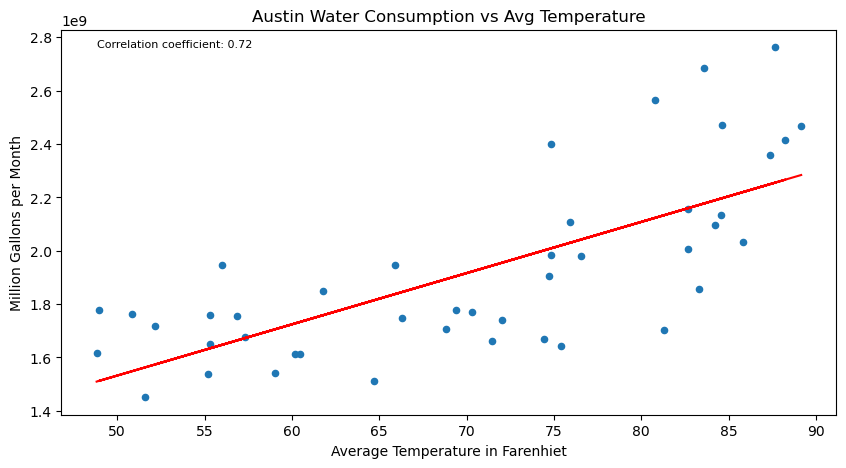

In [ ]:

# Create the scatter plot
merged_df.plot(kind='scatter', x='TempAvgF', y='Total Gallons',figsize=(10, 5))
# Add labels and title
plt.xlabel('Average Temperature in Farenhiet')
plt.ylabel('Million Gallons per Month')
plt.title('Austin Water Consumption vs Avg Temperature')

# # Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress( merged_df['TempAvgF'],merged_df['Total Gallons'])
regress_values = merged_df['TempAvgF'] * slope + intercept # (xm + y)

# Add correlation text to the plot
plt.text(merged_df['TempAvgF'].min(), merged_df['Total Gallons'].max(), f"Correlation coefficient: {rvalue:.2f}", fontsize=8)

# # generate line plot (color is red and solid)
plt.plot(merged_df['TempAvgF'],regress_values,"r-")

# Save the plot
plt.savefig('Images/q1_scatter.png')
# Display the plot

print(f"Correlation coefficient: {rvalue:.2f}")
print(f"pvalue: {pvalue}")
plt.show()

##### Research question 1:
Is there a relationship between average monthly water usage in Austin and temperature variation (2013-2017 monthly data)?
##### Results:
Based on the analysis of four years of data, we found a strong positive correlation (Correlation coefficient: 0.72) between average temperature and monthly water consumption. This indicates that as the average temperature increases, the monthly water consumption tends to increase as well.

Additionally, the extremely low p-value (2.8001668828740518e-08) suggests strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and accept the alternative hypothesis. The observed correlation is statistically significant.

Based on the analysis, we can conclude that as the average temperature rises, we can expect an increase in monthly water consumption. This relationship is unlikely to be a coincidence.

Limitations: The analysis has not considered other factors, such as city growth.

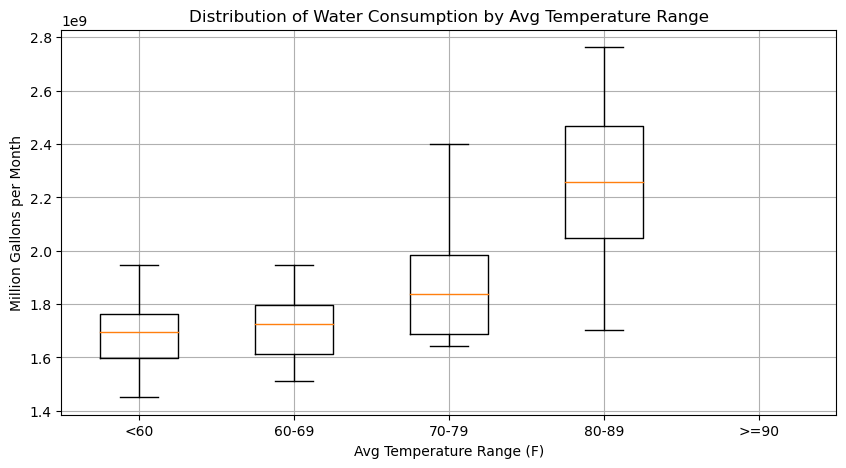

In [ ]:
# Create temperature ranges
temperature_ranges = ['<60', '60-69', '70-79', '80-89', '>=90']

# Assign temperature range labels to each row based on 'TempAvgF'
merged_df['Temp Range'] = pd.cut(merged_df['TempAvgF'], bins=[0, 59.99, 69.99, 79.99, 89.99, 100], labels=temperature_ranges)

# Create a list to store the 'Total Gallons' data for each temperature range
data_by_temp_range = []

# Iterate over each temperature range
for temp_range in temperature_ranges:
    # Filter the data for the current temperature range
    filtered_data = merged_df[merged_df['Temp Range'] == temp_range]['Total Gallons']
    # Append the filtered data to the list
    data_by_temp_range.append(filtered_data)

plt.figure(figsize=(10, 5))

# Create the box plot
plt.boxplot(data_by_temp_range, labels=temperature_ranges)

# Adding labels and title
plt.xlabel('Avg Temperature Range (F)')
plt.ylabel('Million Gallons per Month')
plt.title('Distribution of Water Consumption by Avg Temperature Range')
# Add grids
plt.grid(True)
# # Add the median value as a line on the plot
# plt.axhline(1700000000, color='red', linestyle='--')

plt.savefig('Images/q1_boxplot.png')
# Display the plot
plt.show()

By analyzing the box plot, we observed that the median water consumption increases as the temperature ranges become higher. This suggests a positive relationship between temperature and water consumption

In [ ]:
# Calculate statistics for each temperature range
statistics = {}
for temp_range in temperature_ranges:
    filtered_data = merged_df[merged_df['Temp Range'] == temp_range]['Total Gallons']
    statistics[temp_range] = {
        'Mean': np.mean(filtered_data),
        'Median': np.median(filtered_data),
        'Min': np.min(filtered_data),
        'Max': np.max(filtered_data),
        'Std': np.std(filtered_data)
    }

# Print the statistics
for temp_range, stats in statistics.items():
    print(f'Temperature Range: {temp_range}')
    print(f'Mean: {round(stats["Mean"]/1000000000,2)} Millions')
    print(f'Median: {round(stats["Median"]/1000000000,2)} Millions')
    print(f'Min: {round(stats["Min"]/1000000000,2)} Millions')
    print(f'Max: {round(stats["Max"]/1000000000,2)} Millions')
    print(f'Standard Deviation: {round(stats["Max"]/1000000000,2)} Millions')
    print()

Temperature Range: <60
Mean: 1.68 Millions
Median: 1.7 Millions
Min: 1.45 Millions
Max: 1.95 Millions
Standard Deviation: 1.95 Millions

Temperature Range: 60-69
Mean: 1.72 Millions
Median: 1.73 Millions
Min: 1.51 Millions
Max: 1.95 Millions
Standard Deviation: 1.95 Millions

Temperature Range: 70-79
Mean: 1.89 Millions
Median: 1.84 Millions
Min: 1.64 Millions
Max: 2.4 Millions
Standard Deviation: 2.4 Millions

Temperature Range: 80-89
Mean: 2.27 Millions
Median: 2.26 Millions
Min: 1.7 Millions
Max: 2.76 Millions
Standard Deviation: 2.76 Millions

Temperature Range: >=90
Mean: nan Millions
Median: nan Millions
Min: nan Millions
Max: nan Millions
Standard Deviation: nan Millions



In [25]:
# Create a season column based on the month
merged_df['Season'] = merged_df['Date'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                                   else 'Spring' if x in [3, 4, 5]
                                                                   else 'Summer' if x in [6, 7, 8]
                                                                   else 'Fall' if x in [9, 10, 11]
                                                                   else '')

# Group the data by seasons
merged_df.head(10)

,Date,Total Gallons,TempAvgF,TempHighF,Temp Range,Season
0,2013-12-01,1616286200,48.82,59.000000,<60,Winter
1,2014-01-01,1761888000,50.87,63.612903,<60,Winter
2,2014-02-01,1538954800,55.18,66.464286,<60,Winter
3,2014-03-01,1541012400,59.06,70.612903,<60,Spring
4,2014-04-01,1779458600,69.40,79.833333,60-69,Spring
5,2014-05-01,1985723400,74.81,85.419355,70-79,Spring
6,2014-06-01,2005111400,82.70,90.966667,80-89,Summer
7,2014-07-01,2134472900,84.58,95.193548,80-89,Summer
8,2014-08-01,2358940000,87.35,99.032258,80-89,Summer
9,2014-09-01,2564459200,80.80,90.500000,80-89,Fall


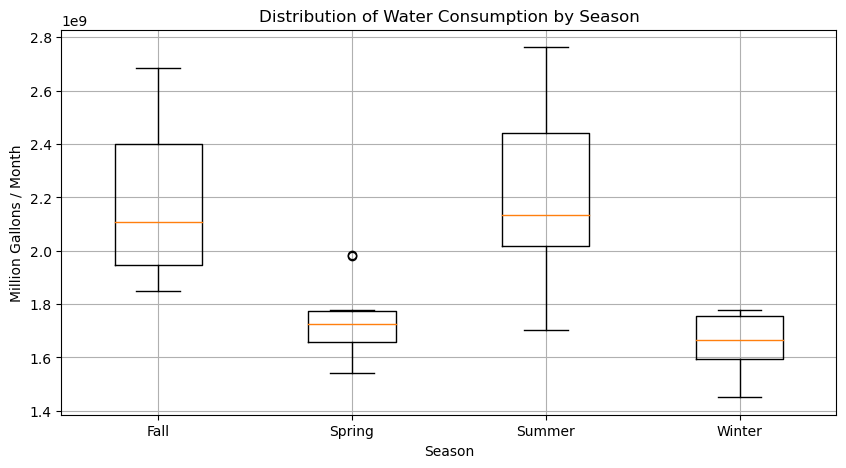

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 5))
fall_df = merged_df[merged_df["Season"] == "Fall"]["Total Gallons"]
summer_df = merged_df[merged_df["Season"] == "Summer"]["Total Gallons"]
winter_df = merged_df[merged_df["Season"] == "Winter"]["Total Gallons"]
spring_df = merged_df[merged_df["Season"] == "Spring"]["Total Gallons"]
plt.boxplot([fall_df,spring_df,summer_df,winter_df])
plt.xticks([1, 2, 3, 4], ["Fall", "Spring", "Summer", "Winter"])
plt.title('Distribution of Water Consumption by Season')
plt.ylabel('Million Gallons / Month')
plt.xlabel('Season')
plt.grid(True)
plt.savefig('Images/q2_boxplot.png')
# Show the plot
plt.show()

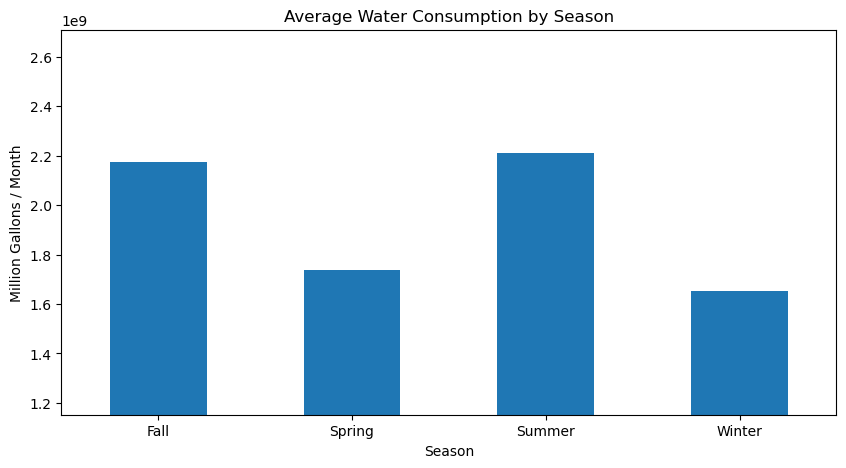

In [ ]:
season_avg = merged_df.groupby('Season')['Total Gallons'].mean()
season_avg.plot(kind="bar", figsize=(10,5))
plt.xlabel('Season')
plt.ylabel('Million Gallons / Month')
plt.title('Average Water Consumption by Season')
plt.xticks(rotation='horizontal')
plt.ylim(season_avg.min()-500000000, season_avg.max()+500000000)
plt.savefig('Images/q2_bar.png')
plt.show()

In [ ]:

# # Create the line plot
# date_index_df['TempAvgF'].plot(kind='line',figsize=(10, 5))

# # Add labels and title
# plt.xlabel('Month')
# plt.ylabel('Average temperature in Farenheit')
# plt.title('Average temperature over Time')

# # Display the plot
# plt.show()

In [ ]:
# # Set 'Date' column as the index
# date_index_df = merged_df.set_index('Date', inplace=False)
# # Create the line plot
# date_index_df['Total Gallons'].plot(kind='line',figsize=(10, 5))
# # Add labels and title
# plt.xlabel('Month')
# plt.ylabel('Million Gallons / Month')
# plt.title('Austin Water Consumption over Time')
# # Display the plot
#  # Plot both of these lines so that they will appear on our final chart
# plt.show()